In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.DataFrame(pd.read_csv(r'/content/drive/My Drive/raw_data1.csv'))
# print(df.columms)

In [ ]:
print(df.columns)

Index(['Patient Number', 'State Patient Number', 'Date Announced',
       'Estimated Onset Date', 'Age Bracket', 'Gender', 'Detected City',
       'Detected District', 'Detected State', 'State code', 'Current Status',
       'Notes', 'Contracted from which Patient (Suspected)', 'Nationality',
       'Type of transmission', 'Status Change Date', 'Source_1', 'Source_2',
       'Source_3', 'Backup Notes'],
      dtype='object')


### Part A and B

In [ ]:

from urllib.parse import parse_qsl, urljoin, urlparse
dictA={}
dict2=[]
p=0
for i in range(len(df)):
   for u in range(3):
      p=p+1

      url=df.loc[i][16+u]
      if(not pd.isna(url)):
       
        
        u=urlparse(url)
        dom = f"{u.netloc}"
        if(dom==""):
          # print(url)
          dict2.append(url)


        # print(dom)
        # if remove_http:
        #       dom = f"{u.netloc}"
        # else:
        #       dom = f"{u.netloc}://{u.netloc}"
        if dom in dictA.keys():
            di={dom:dictA.get(dom)+1}
            dictA.update(di)
        else:
            dictA[dom]=1
        

from collections import Counter
dicttemp=Counter(dict2)

# print(dicttemp)

dicttemp['nhmharyana.gov.in'] =dicttemp['http://www.nhmharyana.gov.in/WriteReadData/userfiles/file/CoronaVirus/Media%20Bullitein%2028%20March%20Evening.pdf']
del dicttemp['http://www.nhmharyana.gov.in/WriteReadData/userfiles/file/CoronaVirus/Media%20Bullitein%2028%20March%20Evening.pdf'] 
dicttemp['times of india']=dicttemp['https://timesofindia.indiatimes.com/city/raipur/two-more-positive-cases-reported-in-chhattisgarh-taking-total-number-of-covid-19-to-3-in-state/articleshow/74814186.cms']

del dicttemp['https://timesofindia.indiatimes.com/city/raipur/two-more-positive-cases-reported-in-chhattisgarh-taking-total-number-of-covid-19-to-3-in-state/articleshow/74814186.cms']
d={"nhmharyana.gov.in":16+dicttemp.get("nhmharyana.gov.in")}
dicttemp.update(d)
del dicttemp["http://www.nhmharyana.gov.in/WriteReadData/userfiles/file/CoronaVirus/Bulletin12042020%20evening.pdf"]
print(dicttemp)

d1={'mohfw.gov.in': 179, 'Press Bulletin': 88, 'State Bulletin: 05 Apr Evening': 86,
    'UP State bulletin': 51, "CM's Meet": 30, 'State Bulletin, 6th Apr 8AM': 27, 'State Bulletin': 23,
    'nhmharyana.gov.in': 16, 'State Health Bulletin': 13, 'State Bulletin, 6th Apr': 11, 'State bulletin': 10,
    'State Health Bulletin - 23rd Mar 2pm': 7, 'State Health Bulletion - 24th Mar 8am': 5,
    'State Health Bulletin - 22nd March': 4, 'Greater Mumbai Health Department Update': 4, 'UT Health Bulletin': 3,
    'UT Bulletin, 6th Apr upto 3PM': 3,'P62929': 1, 'punemirror check for recovery news': 1, 'P56': 1,
    'Gujarat Dashboard': 1, 'punemirror.indiatimes.com': 1, 'sakaltimes.com': 1}
dictA.update(d1)
print("seg")
print(dictA) 


print(dictA)
print(dictA.get("mobile.twitter.com"))
di={"twitter.com":dictA.get("mobile.twitter.com")+dictA.get("twitter.com")}

del dictA['mobile.twitter.com'] 
dictA.update(di)
print(dictA)  



print(sorted(dictA.items(), key=lambda x: x[1], reverse=True))

import plotly.graph_objects as go

keyslist = [ k for k in dictA ]

valueslist = [ v for v in dictA.values() ]
fig = go.Figure(
    data=[go.Bar(x=keyslist, y=valueslist)],
    layout=go.Layout(
        title=go.layout.Title(text="Sources of Information in the Dataset")
    )
)

fig.show()

Counter({'mohfw.gov.in': 179, 'Press Bulletin': 88, 'State Bulletin: 05 Apr Evening': 86, 'UP State bulletin': 51, "CM's Meet": 30, 'State Bulletin, 6th Apr 8AM': 27, 'State Bulletin': 23, 'www.nhmharyana.gov.in/WriteReadData/userfiles/file/CoronaVirus/Bulletin12042020%20evening.pdf': 16, 'nhmharyana.gov.in': 16, 'State Health Bulletin': 13, 'State Bulletin, 6th Apr': 11, 'State bulletin': 10, 'State Health Bulletin - 23rd Mar 2pm': 7, 'State Health Bulletion - 24th Mar 8am': 5, 'State Health Bulletin - 22nd March': 4, 'Greater Mumbai Health Department Update': 4, 'UT Health Bulletin': 3, 'UT Bulletin, 6th Apr upto 3PM': 3, ' https://timesofindia.indiatimes.com/city/raipur/two-more-positive-cases-reported-in-chhattisgarh-taking-total-number-of-covid-19-to-3-in-state/articleshow/74814186.cms': 2, 'P62929': 1, 'punemirror check for recovery news': 1, 'P56': 1, 'www.nhmharyana.gov.in/WriteReadData/userfiles/file/CoronaVirus/Media%20Bullitein%2028%20March%20Evening.pdf': 1, 'Gujarat Dashbo

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sourceData.txt to sourceData.txt
Saving tweetsURLCorona.txt to tweetsURLCorona.txt
Saving uniqueTwitterURLs.txt to uniqueTwitterURLs.txt


In [ ]:
file_name = "uniqueTwitterURLs.txt"
twitterURL_list = uploaded[file_name].decode("utf-8").split("\r\n")
print(len(twitterURL_list))
print(twitterURL_list)

915
['https://mobile.twitter.com/ANI/status/1244115714698399744', 'https://mobile.twitter.com/ANI/status/1244118188737957894', 'https://mobile.twitter.com/ANINewsUP/status/1239777755505373184', 'https://mobile.twitter.com/PIBJaipur/status/1240705118342770688', 'https://mobile.twitter.com/PTI_News/status/1241728729958629378', 'https://mobile.twitter.com/PTI_News/status/1242393507890749440', 'https://twitter.com/AamAadmiParty/status/1246408741357944833', 'https://twitter.com/abpanandatv/status/1241737377212559367?s=20', 'https://twitter.com/airnewsalerts/status/1239796624928444416?s=19', 'https://twitter.com/airnewsalerts/status/1243912552972800002', 'https://twitter.com/airnewsalerts/status/1245745097397792768', 'https://twitter.com/airnewsalerts/status/1248262139292323841', 'https://twitter.com/ANI/status/1224221485805395968?s=20', 'https://twitter.com/ANI/status/1238482416936701953', 'https://twitter.com/ANI/status/1238882567987662855', 'https://twitter.com/ANI/status/1239183764946731

In [ ]:
#Printing Unique Tweet ID and Username

usernameList = list()
tweetIDlist = list()

userTweetDict = dict()

import re
count = 1
for urlString in twitterURL_list:
  print("Tweet -", count)
  #For Tweet ID
  curTweetID = re.search('/status/(\d+)', urlString).group(1)
  tweetIDlist.append(curTweetID)

  print(curTweetID)

  #For Username
  curUsername = re.search(r'.com/([^/?]+)', urlString).group(1)
  usernameList.append(curUsername)
  print(curUsername)
  print("-----------------")
  count = count + 1

  userTweetDict[curTweetID] = curUsername


Tweet - 1
1244115714698399744
ANI
-----------------
Tweet - 2
1244118188737957894
ANI
-----------------
Tweet - 3
1239777755505373184
ANINewsUP
-----------------
Tweet - 4
1240705118342770688
PIBJaipur
-----------------
Tweet - 5
1241728729958629378
PTI_News
-----------------
Tweet - 6
1242393507890749440
PTI_News
-----------------
Tweet - 7
1246408741357944833
AamAadmiParty
-----------------
Tweet - 8
1241737377212559367
abpanandatv
-----------------
Tweet - 9
1239796624928444416
airnewsalerts
-----------------
Tweet - 10
1243912552972800002
airnewsalerts
-----------------
Tweet - 11
1245745097397792768
airnewsalerts
-----------------
Tweet - 12
1248262139292323841
airnewsalerts
-----------------
Tweet - 13
1224221485805395968
ANI
-----------------
Tweet - 14
1238482416936701953
ANI
-----------------
Tweet - 15
1238882567987662855
ANI
-----------------
Tweet - 16
1239183764946731008
ANI
-----------------
Tweet - 17
1239454591894163458
ANI
-----------------
Tweet - 18
12394645974860718

In [ ]:
import tweepy
import datetime


#Consumer Key (API Key), Consumer Secret (API Secret)
auth = tweepy.OAuthHandler('Ph8Hxa38X8oNh4vcBPj5n1v0j', 
                           'y8z5MaZR6vmpCYcY6IdH9HHhE1JZndDxhAzpMNkVbo0ZDtz3aS')
# Access Token, Access Token Secret
auth.set_access_token('1214420430435405824-baXQVfebpgwLr0r2QWIv9I46D8uO4S', 
                      'm5fmL9jtyzjGpsZlmtQsnbw1jRNLwOYk7nXLxLj1QpoY1')

'''

auth = tweepy.OAuthHandler('RxHgbhWa2SzTTl0WKMeUNAFtC', 
                           'ONM5lQzjredzr2FVF7gBy2jK6yIeNZn1yTxVfkNd2VgkHdY24l')

# Access Token, Access Token Secret
auth.set_access_token('1214420430435405824-438nQm3cMp7O0CI3RSLhJxPaFuMfvc', 
                      'rwnUCT3M75Xq6J5UQLvNezc53KP2PoyAhWR6pM53xPY4H')

'''

api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#Printing the Tweet based on the ID
count = 0
dateTweet = dict()
tweetText = ""  #For the Word Cloud in part H
tweetsarr=[]
for curTweetID in tweetIDlist:
  try:
    currentTweet = api.get_status(curTweetID)
    dateTweet[curTweetID] = currentTweet.created_at
    count = count + 1
    print(count, " Tweet -> ", currentTweet.created_at, " - ", currentTweet.text)
    tweetText += currentTweet.text
    tweetsarr.append(currentTweet.text)
    print()
  except tweepy.TweepError:
    pass

1  Tweet ->  2020-03-29 04:14:35  -  Rajasthan: A 53-year-old woman has also tested positive for #COVID19 in Bhilwara, 25 people have tested positive ti… https://t.co/AOFJtnLkxB

2  Tweet ->  2020-03-29 04:24:25  -  Maharashtra: 7 more #COVID19 cases reported in the state(4 from Mumbai, 1 from Pune and 1 each from Sangli and Nagp… https://t.co/ug7ybcm9ZF

3  Tweet ->  2020-03-17 04:57:05  -  Gautam Budh Nagar CMO Anurag Bhargav: Two persons test positive for Coronavirus; one in Sector 78 and another in Se… https://t.co/52TbkyEoo9

4  Tweet ->  2020-03-19 18:22:06  -  #Rajasthan #CoronaVirusUpdate 

A couple tested #COVID19 positive in #Jaipur. The couple returned to #Jaipur from… https://t.co/YNbYn07QVk

5  Tweet ->  2020-03-22 14:09:34  -  Woman, son test positive for coronavirus in Greater Noida (West), total no. of cases in Gautam Buddh Nagar 8: Officials

6  Tweet ->  2020-03-24 10:11:09  -  A 47-year-old woman with no recent history of foreign travel tests positive for COVID-19 in

### part F

In [ ]:
import spacy 
nlp = spacy.load('en_core_web_sm') 
for i in range(1,700,25):
  doc = nlp(tweetsarr[i]) 
  print("TWEET:", i)
  print(tweetsarr[i])
  print("Entities: ")
  for ent in doc.ents: 
      print(ent.text,  ent.label_)
  print("------------")
  print() 

TWEET: 1
Maharashtra: 7 more #COVID19 cases reported in the state(4 from Mumbai, 1 from Pune and 1 each from Sangli and Nagp… https://t.co/ug7ybcm9ZF
Entities: 
7 CARDINAL
Mumbai GPE
1 CARDINAL
Pune GPE
1 CARDINAL
Sangli and Nagp ORG
------------

TWEET: 26
Maharashtra: One more person has tested positive for #Coronavirus in Pimpri-Chinchwad; the person has a travel hist… https://t.co/gy0YgzDXo6
Entities: 
One CARDINAL
Coronavirus PERSON
Pimpri-Chinchwad NORP
------------

TWEET: 51
A 22-year-old man from Bhatkal who had returned from Dubai on March 19 has been tested positive for #CoronaVirus: S… https://t.co/05XqAfOuG8
Entities: 
Bhatkal NORP
Dubai GPE
March 19 DATE
CoronaVirus PERSON
------------

TWEET: 76
5 more people have tested positive for #coronavirus - 4 from Nagpur &amp; 1 from Gondia: Divisional Commissioner  Nagpur (Maharashtra)
Entities: 
5 CARDINAL
#coronavirus - 4 MONEY
Nagpur &amp ORG
1 CARDINAL
Gondia GPE
Nagpur GPE
Maharashtra ORG
------------

TWEET: 101
20 more po

In [ ]:
print(dateTweet)
print()

#Sorted in Descending Order
sortedDateTweet = {k: v for k, v in sorted(dateTweet.items(), key=lambda item: item[1], reverse=True)}
print(sortedDateTweet)


{'1244115714698399744': datetime.datetime(2020, 3, 29, 4, 14, 35), '1244118188737957894': datetime.datetime(2020, 3, 29, 4, 24, 25), '1239777755505373184': datetime.datetime(2020, 3, 17, 4, 57, 5), '1240705118342770688': datetime.datetime(2020, 3, 19, 18, 22, 6), '1241728729958629378': datetime.datetime(2020, 3, 22, 14, 9, 34), '1242393507890749440': datetime.datetime(2020, 3, 24, 10, 11, 9), '1241737377212559367': datetime.datetime(2020, 3, 22, 14, 43, 55), '1239796624928444416': datetime.datetime(2020, 3, 17, 6, 12, 4), '1243912552972800002': datetime.datetime(2020, 3, 28, 14, 47, 18), '1245745097397792768': datetime.datetime(2020, 4, 2, 16, 9, 10), '1248262139292323841': datetime.datetime(2020, 4, 9, 14, 51), '1224221485805395968': datetime.datetime(2020, 2, 3, 6, 42, 1), '1238482416936701953': datetime.datetime(2020, 3, 13, 15, 9, 52), '1238882567987662855': datetime.datetime(2020, 3, 14, 17, 39, 56), '1239183764946731008': datetime.datetime(2020, 3, 15, 13, 36, 47), '1239454591894

### part C


In [ ]:
#PART C

recentCount = 1
for sortedTweetID in sortedDateTweet:
  try:
    currentTweet = api.get_status(sortedTweetID)
    curUsername = userTweetDict.get(sortedTweetID)
    print("RANK", recentCount, "| Username ->", curUsername ,"| Tweet -> ", currentTweet.created_at, " - ", currentTweet.text)
    recentCount = recentCount + 1
    print()
    if(recentCount > 10):
      break
  except tweepy.TweepError:
    pass

RANK 1 | Username -> sanjayjavin | Tweet ->  2020-04-19 18:19:19  -  #BiharFightsCorona  fifth update of the day.3 more covid-19 positive cases in bihar taking the total to 96. 3-male… https://t.co/vuxtWkPlx6

RANK 2 | Username -> kansalrohit69 | Tweet ->  2020-04-19 17:46:32  -  Just In
4 new cases from Kashmir- 3 from Bandipora, 1 from Baramulla. Total positive cases now 354 (55 Jammu,  299 Kashmir) @diprjk

RANK 3 | Username -> ANI | Tweet ->  2020-04-19 16:49:33  -  Two more positive #COVID19 cases reported in Dehradun today, taking total number of positive cases in the state to… https://t.co/sv33qr6TXl

RANK 4 | Username -> ANI | Tweet ->  2020-04-19 15:59:09  -  #COVID19 cases reach 858 in Telangana including 186 patients who have been cured &amp; 21 deaths: Chief Minister K Chan… https://t.co/PLVR6am2ps

RANK 5 | Username -> ANI | Tweet ->  2020-04-19 15:18:01  -  Three more #COVID19 positive cases reported in Hindpiri today. All have contact history with previous positive case…

### part D

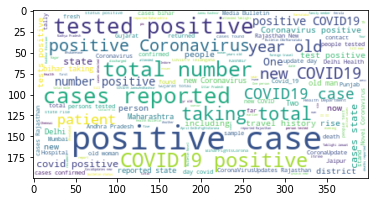

In [ ]:
#PART D

#Wordcloud Code

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import matplotlib.pyplot as plt

def make_word_cloud(tweet_text, stopwords):        
    wordcloud = WordCloud(background_color="white", stopwords=stopwords).generate(tweet_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

stopwords = set(STOPWORDS)
stopwords.add('https')
stopwords.add('BCwn8xx039RT')
stopwords.add("Fbzw6mR9Q5")
stopwords.add("RT")
stopwords.add("CO")


stopwords.add("READ")
stopwords.add("via")
stopwords.add("amp")
stopwords.add("say")
stopwords.add("today")
stopwords.add("quotes")
stopwords.add("says")

make_word_cloud(tweetText, stopwords)

#As seen from the Word Cloud, the words COVID19, Positive, Patient, Tested, Total Number, Cases, Reported are the most prominent words

### part H

In [ ]:
#PART H
import collections
import matplotlib.pylab as plt

usernameList.sort()
print(usernameList)
print()
tweetFreqCount = collections.Counter(usernameList).most_common()
print(tweetFreqCount)

#From this it is clearly seen that ANI has the most number of tweets i.e 322 Tweets
#YES, it is Verified. ANI stands for Asian News International and is a Multi-media news agency.


['ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI', 'ANI'

### part E

In [ ]:
#PART E

import json

verifiedCount = 0
unverifiedCount = 0

tweetCount = 0

tweetVerifiedDict = dict() #Dictionary to show TweetID and whether the Tweet is from a Verified User or not

unverifiedUsers = dict() #To get Tweet Count of Unverified Users


for curTweetID in tweetIDlist:
  try:
    currentTweet = api.get_status(curTweetID)
    verifiedBoolean = currentTweet.user.verified
    tweetVerifiedDict[curTweetID] = verifiedBoolean
    verUser = currentTweet.user.screen_name
    if(verifiedBoolean is True):
      verifiedCount = verifiedCount + 1
    else:
      unverifiedCount = unverifiedCount + 1
      unverifiedUsers[verUser] = unverifiedUsers.get(verUser, 0) + 1

  except tweepy.TweepError:
    pass

print(tweetVerifiedDict)
print()
print("Verified User Tweets:", verifiedCount)
print()
print("Unverified User Tweets:", unverifiedCount)
print()
print(unverifiedUsers)

{'1244115714698399744': True, '1244118188737957894': True, '1239777755505373184': True, '1240705118342770688': True, '1241728729958629378': True, '1242393507890749440': True, '1241737377212559367': True, '1239796624928444416': True, '1243912552972800002': True, '1245745097397792768': True, '1248262139292323841': True, '1224221485805395968': True, '1238482416936701953': True, '1238882567987662855': True, '1239183764946731008': True, '1239454591894163458': True, '1239464597486071808': True, '1239546773883850753': True, '1239597418640900096': True, '1239769810608590848': True, '1239886488629698567': True, '1239891569785765893': True, '1239894891678724097': True, '1239953388248260608': True, '1239969373013438464': True, '1240112477951496198': True, '1240287855051599872': True, '1240304049422888960': True, '1240318300942266368': True, '1240318435646525442': True, '1240458341421182979': True, '1240499601313943557': True, '1240506778174910465': True, '1240658425328979971': True, '124088024219

In [ ]:
unverifiedUsernames = list(unverifiedUsers.keys())
print(unverifiedUsernames)

['CollectorDnh', 'diprjk', 'GujHFWDept', 'IEBengaluru', 'IPRTelangana', 'kansalrohit69', 'kbssidhu1961', 'ladags', 'MoHFW_GUJARAT', 'nagarkoti', 'nhm_hp', 'PIBShimla', 'RishikaSadam', 'sanjayjavin', 'SreyashiDey', 'TelanganaHealth', 'wilson_thehindu', 'xpressandhra']


In [ ]:
unverifiedFollowers = []
unverifiedFollowee = []
unverifiedRatios = []

unvCount = 1
for uName in unverifiedUsernames:
  try:
    print("Unverified Account", unvCount)
    unvCount = unvCount + 1
    tempUser = api.get_user(uName)
    tempName = tempUser.name
    print("Username ->", uName, "| Name ->", tempName)

    tempFollowers = tempUser.followers_count
    tempFollowing = tempUser.friends_count
    tempLikes = tempUser.favourites_count
    tempStatuses = tempUser.statuses_count
    tempCreated = tempUser.created_at
    tempLocation = tempUser.location

    unverifiedFollowers.append(tempFollowers)
    unverifiedFollowee.append(tempFollowing)
    unverifiedRatios.append(tempFollowers/tempFollowing)

    print("Created at:", tempCreated ,"| Followers:", tempFollowers, "| Following:", tempFollowing, "| Location:", tempLocation)
    print("Number of Statuses:", tempStatuses, "| Number of Likes:", tempLikes)
    print()
    print("----------------------------------")
  except tweepy.TweepError:
    pass

Unverified Account 1
Username -> CollectorDnh | Name -> Collector DNH
Created at: 2020-03-20 07:55:26 | Followers: 1513 | Following: 9 | Location: 
Number of Statuses: 64 | Number of Likes: 7

----------------------------------
Unverified Account 2
Username -> diprjk | Name -> DIPR-J&K
Created at: 2017-02-12 06:45:15 | Followers: 85892 | Following: 171 | Location: Jammu and Kashmir
Number of Statuses: 20310 | Number of Likes: 98

----------------------------------
Unverified Account 3
Username -> GujHFWDept | Name -> GujHFWDept
Created at: 2016-10-14 11:36:34 | Followers: 22630 | Following: 158 | Location: Gandhinagar, Gujarat, India
Number of Statuses: 4091 | Number of Likes: 5378

----------------------------------
Unverified Account 4
Username -> IEBengaluru | Name -> Express Bengaluru
Created at: 2019-04-03 10:32:11 | Followers: 2697 | Following: 158 | Location: Bengaluru, India
Number of Statuses: 3347 | Number of Likes: 1

----------------------------------
Unverified Account 5
U

In [ ]:
print(unverifiedUsernames)
print(unverifiedFollowers)
print(unverifiedFollowee)
print(unverifiedRatios)

['CollectorDnh', 'diprjk', 'GujHFWDept', 'IEBengaluru', 'IPRTelangana', 'kansalrohit69', 'kbssidhu1961', 'ladags', 'MoHFW_GUJARAT', 'nagarkoti', 'nhm_hp', 'PIBShimla', 'RishikaSadam', 'sanjayjavin', 'SreyashiDey', 'TelanganaHealth', 'wilson_thehindu', 'xpressandhra']
[1513, 85892, 22630, 2697, 16343, 128355, 25651, 4062, 20417, 4045, 1749, 888, 8467, 64088, 2668, 80173, 880, 2091]
[9, 171, 158, 158, 14, 298, 1726, 1809, 47, 358, 127, 58, 565, 389, 472, 19, 334, 152]
[168.11111111111111, 502.2923976608187, 143.22784810126583, 17.069620253164558, 1167.357142857143, 430.72147651006713, 14.861529548088065, 2.2454394693200666, 434.40425531914894, 11.298882681564246, 13.771653543307087, 15.310344827586206, 14.985840707964602, 164.75064267352184, 5.6525423728813555, 4219.631578947368, 2.6347305389221556, 13.756578947368421]


In [ ]:
#Follower-Followee Graph for Unverified Users in the Dataset

keyslist = [ k for k in unverifiedUsernames ]

valueslist = [ v for v in unverifiedRatios ]
fig = go.Figure(
    data=[go.Bar(x=keyslist, y=valueslist)],
    layout=go.Layout(
        title=go.layout.Title(text="Ratio of Followers to Followees")
    )
)

fig.show()

### part G

In [ ]:
# part G
import pickle
Tweet_text={}
for id in tweetIDlist:
  try:
    currentTweet = api.get_status(id)
  except:
    continue
  Tweet_text[id]=currentTweet.text
print(Tweet_text)


{'1244115714698399744': 'Rajasthan: A 53-year-old woman has also tested positive for #COVID19 in Bhilwara, 25 people have tested positive ti… https://t.co/AOFJtnLkxB', '1244118188737957894': 'Maharashtra: 7 more #COVID19 cases reported in the state(4 from Mumbai, 1 from Pune and 1 each from Sangli and Nagp… https://t.co/ug7ybcm9ZF', '1239777755505373184': 'Gautam Budh Nagar CMO Anurag Bhargav: Two persons test positive for Coronavirus; one in Sector 78 and another in Se… https://t.co/52TbkyEoo9', '1240705118342770688': '#Rajasthan #CoronaVirusUpdate \n\nA couple tested #COVID19 positive in #Jaipur. The couple returned to #Jaipur from… https://t.co/YNbYn07QVk', '1241728729958629378': 'Woman, son test positive for coronavirus in Greater Noida (West), total no. of cases in Gautam Buddh Nagar 8: Officials', '1242393507890749440': 'A 47-year-old woman with no recent history of foreign travel tests positive for COVID-19 in Noida: Officials', '1241737377212559367': '#CoronaUpdatesInIndia \n#C

In [ ]:
Tweet_info=[]
for i in Tweet_text.keys():
  for j in range(df.shape[0]):
    if isinstance(df.iloc[j]['Source_1'],str):
        if i in df.iloc[j]['Source_1']:
          Tweet_info.append((i,Tweet_text[i],df.iloc[j][ 'Detected City'],df.iloc[j]['Detected District'],df.iloc[j]['Detected State']))
          break
    if isinstance(df.iloc[j]['Source_2'],str):
        if i in df.iloc[j]['Source_2']:
          Tweet_info.append((i,Tweet_text[i],df.iloc[j][ 'Detected City'],df.iloc[j]['Detected District'],df.iloc[j]['Detected State']))
          break
    if isinstance(df.iloc[j]['Source_3'],str):
        if i in df.iloc[j]['Source_3']:
          Tweet_info.append((i,Tweet_text[i],df.iloc[j][ 'Detected City'],df.iloc[j]['Detected District'],df.iloc[j]['Detected State']))
          break
      
print(Tweet_info)

[('1244115714698399744', 'Rajasthan: A 53-year-old woman has also tested positive for #COVID19 in Bhilwara, 25 people have tested positive ti… https://t.co/AOFJtnLkxB', nan, 'Bhilwara', 'Rajasthan'), ('1244118188737957894', 'Maharashtra: 7 more #COVID19 cases reported in the state(4 from Mumbai, 1 from Pune and 1 each from Sangli and Nagp… https://t.co/ug7ybcm9ZF', nan, 'Mumbai', 'Maharashtra'), ('1239777755505373184', 'Gautam Budh Nagar CMO Anurag Bhargav: Two persons test positive for Coronavirus; one in Sector 78 and another in Se… https://t.co/52TbkyEoo9', 'Noida', 'Gautam Buddha Nagar', 'Uttar Pradesh'), ('1240705118342770688', '#Rajasthan #CoronaVirusUpdate \n\nA couple tested #COVID19 positive in #Jaipur. The couple returned to #Jaipur from… https://t.co/YNbYn07QVk', 'Jaipur', 'Jaipur', 'Rajasthan'), ('1241728729958629378', 'Woman, son test positive for coronavirus in Greater Noida (West), total no. of cases in Gautam Buddh Nagar 8: Officials', 'Greater Noida', 'Gautam Buddha Na

In [ ]:
print(len(Tweet_info))

893


In [ ]:
with open('tweet_info.pickle', 'wb') as handle:
    pickle.dump(Tweet_info, handle)

In [ ]:
import pickle
with open('tweet_info.pickle', 'rb') as handle:
    data = pickle.load(handle)
Tweet_info=data

In [ ]:
#Ignore, please proceed to the next block of code

!pip install git+https://github.com/jmbielec/geograpy3.git 
import geograpy3
link = 'i am from Bangalore'
places = geograpy3.get_place_context(text = link)
places = geograpy3.get_place_context(text = 'i am from India')

  Cloning https://github.com/jmbielec/geograpy3.git to /tmp/pip-req-build-mtgncu9g
  Running command git clone -q https://github.com/jmbielec/geograpy3.git /tmp/pip-req-build-mtgncu9g
     |████████████████████████████████| 143kB 5.1MB/s 
     |████████████████████████████████| 10.0MB 14.1MB/s 
     |████████████████████████████████| 215kB 46.7MB/s 
     |████████████████████████████████| 7.4MB 45.6MB/s 
     |████████████████████████████████| 194kB 45.3MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
  Created wheel for geograpy3: filename=geograpy3-1.0.0-cp36-none-any.whl size=1326774 sha256=8ffc5580913fc52e14a953e13391e3464daac9cca80c18ec9938f0d519ce23dd
  Stored in directory: /tmp/pip-ephem-wheel-cache-3h2ysqof/wheels/f0/1f/f2/7dcf0781518d754b7abc6108c52a669b9b950fb1ba5d430c1f
  Created wheel for jellyfish: filename=jellyfish-0.7.2-cp36-cp36m-linux_x86_64.whl size=72999 sha256=babac408136ed399354278e38ffe624ac9c15a9e556be63023751fc99e85338b
  Stored in directory: /root/.

In [ ]:
per=0
for i in Tweet_info:
  places = geograpy3.get_place_context(text=i[1])
  if (i[2] in places.countries) or (i[2] in places.regions) or (i[2] in places.cities) or (i[2] in places.other):
    per+=1
  if (i[3] in places.countries) or (i[3] in places.regions) or (i[3] in places.cities) or (i[3] in places.other):
    per+=1
  if (i[4] in places.countries) or (i[4] in places.regions) or (i[4] in places.cities) or (i[4] in places.other):
    per+=1
print(per*100/len(Tweet_info))

73.79619260918253


In [ ]:
print(len(Tweet_info))

893
